<a href="https://colab.research.google.com/github/Braelin2/ECGR5101HW1/blob/main/ECGR5101_Homework1_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from os import MFD_HUGE_256MB
df = pd.read_csv("D3.csv")

dataX = df.values[:,:3]
Y = df.values[:,3]

m = len(Y)

theta0 = np.zeros(3);
iterations = 1000
alpha = 0.01

In [ ]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    j = 1 / (2 * m) * np.sum(sqrErrors)
    return j

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

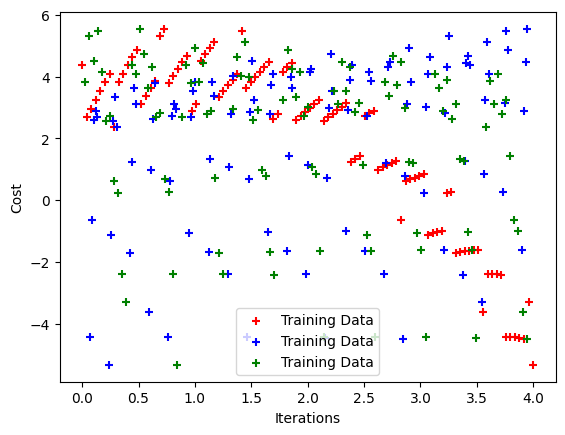

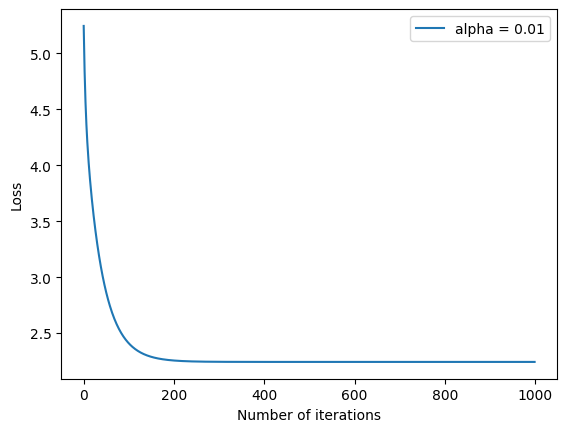

In [31]:
theta, cost_history = gradient_descent(dataX, Y, theta0, alpha, iterations)

plt.scatter(dataX[:,0], Y, color='red', marker='+', label='Training Data')
plt.scatter(dataX[:,1], Y, color='blue', marker='+', label='Training Data')
plt.scatter(dataX[:,2], Y, color='green', marker='+', label='Training Data')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

plt.plot(cost_history, label=f"alpha = {alpha}")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
